# EDA Data Science

Importar librerias 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
from sqlalchemy import create_engine, Column, column, Integer, Float, String, Text, Boolean, Date, DateTime, Time, MetaData, Table, text, insert, select
import matplotlib.pyplot as plt
import seaborn as sns

Configurar conexion a base de datos

In [2]:
database_config = {
    'username': 'base_qa6d_user',
    'password': 'HSqnH1m5ipLbeTkaDUKPTciAbSztBwh0',
    'host': 'dpg-cn5pn90l5elc73e8k72g-a.oregon-postgres.render.com',
    'port': '5432',
    'database': 'base_qa6d'
}

# Construye la URL de conexión
db_url = f'postgresql+psycopg2://{database_config["username"]}:{database_config["password"]}@{database_config["host"]}:{database_config["port"]}/{database_config["database"]}'


In [3]:
#Creo el engine para conectarme
engine = create_engine(db_url)

In [4]:
df = pd.read_sql('historico', engine)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
29710,2024-02-21,360.589996,365.109985,358.950012,364.130005,3277800,0.0,0.0,HD
29711,2024-02-21,58.080002,58.450001,57.145000,57.480000,13377900,0.0,0.0,PYPL
29712,2024-02-21,179.949997,180.990005,178.520004,180.899994,7024000,0.0,0.0,JPM
29713,2024-02-21,523.669983,523.690002,517.539978,521.969971,2095900,0.0,0.0,UNH


In [5]:
#cerramos conexion una vez obtenidos los datos
engine.dispose()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29695 entries, 0 to 29694
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          29695 non-null  datetime64[ns]
 1   Open          29695 non-null  float64       
 2   High          29695 non-null  float64       
 3   Low           29695 non-null  float64       
 4   Close         29695 non-null  float64       
 5   Volume        29695 non-null  int64         
 6   Dividends     29695 non-null  float64       
 7   Stock Splits  29695 non-null  float64       
 8   Ticket        29695 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.0+ MB


Vamos a agregar algunas columnas y hacer unos calculos simples

In [6]:
acciones = df['Ticket'].unique()

In [22]:
df['Rendimiento_diario'] = df['Close'] - df['Open']


In [23]:
#calcular cambio porcentual diario
df['Cambio_porcentual_diario'] = ((df['Close'] - df['Open']) / df['Open']) * 100


In [10]:
for accion in acciones:
    
   if accion == df['Ticket']:
       df['Rendimiento_diario']=df['Close']-df['Open']




In [24]:
df['Dia_semana'] = df['Date'].dt.dayofweek
df['Mes'] = df['Date'].dt.month


In [25]:
#Amplitud diaria
df['Amplitud_diaria'] = df['High'] - df['Low']


In [30]:
for accion in acciones:
    # Filtra el DataFrame solo para la acción actual
    df_accion = df[df['Ticket'] == accion]
    
    # Calcula la media móvil para la acción actual
    window_size = 10  # Ajusta el tamaño de la ventana según sea necesario
    df_accion['SMA'] = df_accion['Close'].rolling(window=window_size).mean()
    
    # Puedes realizar otros cálculos específicos para esta acción si es necesario
    
    # Actualiza el DataFrame original con los resultados para esta acción
    df.loc[df['Ticket'] == accion] = df_accion


C:\Users\Pedro\AppData\Local\Temp\ipykernel_14140\4116031547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accion['SMA'] = df_accion['Close'].rolling(window=window_size).mean()
C:\Users\Pedro\AppData\Local\Temp\ipykernel_14140\4116031547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accion['SMA'] = df_accion['Close'].rolling(window=window_size).mean()
C:\Users\Pedro\AppData\Local\Temp\ipykernel_14140\4116031547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [37]:
df.drop(columns='SMA',inplace=True)

In [53]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Rendimiento_diario,Cambio_porcentual_diario,Dia_semana,Mes,Amplitud_diaria
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL,0.495813,1.234127,1,1,0.717753
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL,-0.070831,-0.173885,2,1,0.611504
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL,0.115691,0.283995,3,1,0.328182
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL,0.368319,0.899445,4,1,0.547755
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL,0.000000,0.000000,0,1,0.396654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29690,2024-02-20,355.309998,365.239990,354.556091,362.570007,4687613,0.0,0.0,HD,7.260010,2.043289,1,2,10.683899
29691,2024-02-20,58.230000,59.021301,58.189999,58.630001,12259114,0.0,0.0,PYPL,0.400002,0.686934,1,2,0.831303
29692,2024-02-20,179.190002,180.460007,178.404999,179.729996,5945083,0.0,0.0,JPM,0.539993,0.301352,1,2,2.055008
29693,2024-02-20,524.210022,525.369995,519.409973,521.059998,2596444,0.0,0.0,UNH,-3.150024,-0.600909,1,2,5.960022


In [28]:
df['Media_Movil_7'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29655 entries, 0 to 29654
Series name: Media_Movil_7
Non-Null Count  Dtype  
--------------  -----  
29535 non-null  float64
dtypes: float64(1)
memory usage: 231.8 KB


In [27]:
df['Rendimiento_diario'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29655 entries, 0 to 29654
Series name: Rendimiento_diario
Non-Null Count  Dtype  
--------------  -----  
29635 non-null  float64
dtypes: float64(1)
memory usage: 231.8 KB


In [54]:
# Calcula la volatilidad por acción
df['Volatilidad'] = df.groupby('Ticket')['Close'].pct_change().rolling(window=7).std().reset_index(0, drop=True)


In [56]:
df.drop(columns='Volatilidad',inplace=True)

In [39]:
df['Volatilidad'] = df['Volatilidad'].fillna(0)

In [57]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Rendimiento_diario,Cambio_porcentual_diario,Dia_semana,Mes,Amplitud_diaria
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL,0.495813,1.234127,1,1,0.717753
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL,-0.070831,-0.173885,2,1,0.611504
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL,0.115691,0.283995,3,1,0.328182
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL,0.368319,0.899445,4,1,0.547755
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL,0.000000,0.000000,0,1,0.396654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29690,2024-02-20,355.309998,365.239990,354.556091,362.570007,4687613,0.0,0.0,HD,7.260010,2.043289,1,2,10.683899
29691,2024-02-20,58.230000,59.021301,58.189999,58.630001,12259114,0.0,0.0,PYPL,0.400002,0.686934,1,2,0.831303
29692,2024-02-20,179.190002,180.460007,178.404999,179.729996,5945083,0.0,0.0,JPM,0.539993,0.301352,1,2,2.055008
29693,2024-02-20,524.210022,525.369995,519.409973,521.059998,2596444,0.0,0.0,UNH,-3.150024,-0.600909,1,2,5.960022


In [ ]:
acciones_por_tanda = 5
num_tandas = (len(df['Ticket'].unique()) - 1) // acciones_por_tanda + 1

# Crear subgráficos
fig, axes = plt.subplots(num_tandas, 1, figsize=(12, num_tandas * 6), sharex=True)

# Generar gráficos para cada tanda de 5 acciones
for i, ax in enumerate(axes):
    subset_df = df[df['Ticket'].isin(list(df['Ticket'].unique())[i * acciones_por_tanda:(i + 1) * acciones_por_tanda])]
    sns.lineplot(x='Date', y='Close', hue='Ticket', data=subset_df, palette='tab10', ax=ax)
    ax.set_title(f'Gráfico de Series Temporales - Precio de Cierre (Tanda {i + 1})')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend(title='Acción')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Dividir en tandas de 5
acciones_por_tanda = 5
num_tandas = (len(df['Ticket'].unique()) - 1) // acciones_por_tanda + 1

# Generar gráficos para cada tanda de 5 acciones
for i in range(num_tandas):
    subset_df = df[df['Ticket'].isin(list(df['Ticket'].unique())[i * acciones_por_tanda:(i + 1) * acciones_por_tanda])]
    fig = px.line(subset_df, x='Date', y='Volatilidad', color='Ticket', title=f'Gráfico de Volatilidad - Tanda {i + 1}')
    fig.update_xaxes(title_text='Fecha')
    fig.update_yaxes(title_text='Volatilidad')
    fig.show()

In [51]:
#dejar
df = pd.get_dummies(df, columns=['Ticket'], drop_first=True)


In [29]:
acciones = df['Ticket'].unique()

In [7]:
df['Fecha'] = df['Date'].astype('int64') // 10**9

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelos_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Preprocesamiento de datos (asegurándonos de que 'Close' sea numérico)
    
    # División de datos en conjunto de entrenamiento y prueba
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    
    # Inicialización del modelo de regresión lineal
    modelo_regresion = LinearRegression()
    
    # Entrenamiento del modelo
    modelo_regresion.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_por_accion[accion] = modelo_regresion

    # Predicciones en el conjunto de prueba
    y_pred = modelo_regresion.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)
    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
1493  1701907200   194.022430       191.173934
1156  1659657600   163.949417       153.660950
1253  1671667200   131.327423       164.324150
561   1585180800    63.014111        87.533768
1098  1652313600   141.156342       147.140288
...          ...          ...              ...
1321  1680480000   165.287766       172.148944
754   1609286400   131.231918       108.936882
1244  1670544000   141.189651       163.326872
1090  1651449600   156.175293       146.373152
867   1623628800   128.461365       121.671350

[309 rows x 3 columns]
Resultados para la acción AAPL:
Mean Squared Error: 244.99171986838488
R-squared (R2): 0.9087489781767587
-------------------------------------
Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
3035  1701907200   138.449997       137.891203
2698  1659657600   118.220001       117.007643
2795  1671667200    88.260002       122.943870
2103  1585180800

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd

modelos_rf_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)

    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para Random Forest en la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')
    nombre_archivo = f'modelo_rf_{accion}.joblib'
    joblib.dump(modelos_rf_por_accion, nombre_archivo)

# Ahora puedes comparar los resultados de Random Forest con los resultados de regresión lineal


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
1494  1701993600   195.460587       183.307122
543   1583107200    72.857330        70.146108
1268  1673913600   135.012100       152.335074
528   1581033600    78.031296        70.146108
1094  1651795200   155.731430       152.335074
...          ...          ...              ...
1225  1668124800   148.678192       152.335074
756   1609718400   127.002113       125.999734
1245  1670803200   143.503738       152.335074
752   1609113600   134.146637       125.999734
869   1623801600   128.136459       125.999734

[309 rows x 3 columns]
Resultados para Random Forest en la acción AAPL:
Mean Squared Error: 59.51015417345099
R-squared (R2): 0.9785185940891149
-------------------------------------
Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
3036  1701993600   136.639999       134.413249
2085  1583107200    69.455498        66.678456
2810  1673913600    92.160004       106.810806


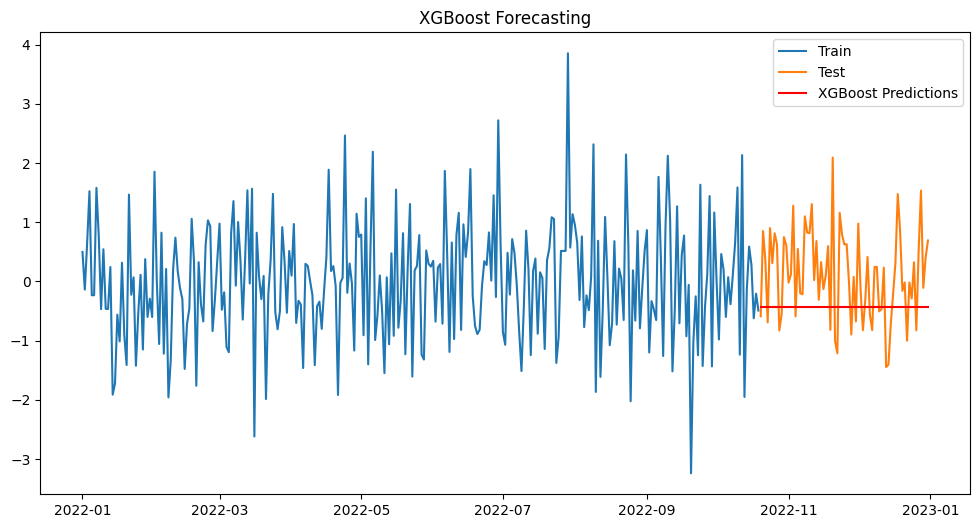

Mean Squared Error: 0.8511768403825245 , r2=-0.5396436439769345


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Generar datos de ejemplo (puedes reemplazar esto con tus propios datos)
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.random.normal(loc=0, scale=1, size=(len(date_rng)))
df = pd.DataFrame(data, columns=['Value'], index=date_rng)

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Preparar las características (X) y la variable objetivo (y)
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train['Value']
X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test['Value']

# Inicializar el modelo XGBoost
model = XGBRegressor()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desplegar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Test')
plt.plot(test.index, y_pred, label='XGBoost Predictions', color='red')
plt.title('XGBoost Forecasting')
plt.legend()
plt.show()

# Calcular el error cuadrático medio
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(test['Value'], y_pred)
print(f'Mean Squared Error: {mse} , r2={r2}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Supongamos que tienes un DataFrame llamado df con las columnas 'Fecha', 'Close' y 'Ticket'
# Asegúrate de que la columna 'Fecha' esté en formato datetime

# Lista para almacenar las predicciones por acción
predicciones_por_accion = []

# Iterar sobre cada acción en el DataFrame
for accion in df['Ticket'].unique():
    # Filtrar el DataFrame para la acción actual
    df_accion = df[df['Ticket'] == accion]

    # Dividir los datos en conjunto de entrenamiento y prueba
    train_size = int(len(df_accion) * 0.8)
    train, test = df_accion[:train_size], df_accion[train_size:]

    # Preparar las características (X) y la variable objetivo (y) para el entrenamiento
    X_train, y_train = np.arange(len(train)).reshape(-1, 1), train['Close']
    X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test['Close']

    # Inicializar el modelo XGBoost
    model = XGBRegressor()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desplegar los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(train['Fecha'], train['Close'], label='Train')
    plt.plot(test['Fecha'], test['Close'], label='Test')
    plt.plot(test['Fecha'], y_pred, label='XGBoost Predictions', color='red')
    plt.title(f'XGBoost Forecasting - {accion}')
    plt.legend()
    plt.show()

    # Calcular el error cuadrático medio
    mse = mean_squared_error(test['Close'], y_pred)
    print(f'Mean Squared Error for {accion}: {mse}, r2 : {r2}')

    # Hacer predicciones para 1 semana en el futuro
    ultima_fecha = df_accion['Date'].max()
    nueva_fecha = ultima_fecha + timedelta(days=7)
    nueva_prediccion = model.predict(np.array([[len(df_accion)]]))  # Usar el último índice como entrada
    print(f'Predicción para {accion} en {nueva_fecha}: {nueva_prediccion[0]}')
    r2 = r2_score(y_test, y_pred)
    # Almacenar las predicciones en la lista
    predicciones_por_accion.extend({
        'Accion': accion,
        'MSE': mse,
        'R2' :r2,
        'Prediccion': nueva_prediccion[0],
        'FechaPrediccion': nueva_fecha
    })


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29695 entries, 0 to 29694
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      29695 non-null  datetime64[ns]
 1   Open                      29695 non-null  float64       
 2   High                      29695 non-null  float64       
 3   Low                       29695 non-null  float64       
 4   Close                     29695 non-null  float64       
 5   Volume                    29695 non-null  int64         
 6   Dividends                 29695 non-null  float64       
 7   Stock Splits              29695 non-null  float64       
 8   Ticket                    29695 non-null  object        
 9   Rendimiento_diario        29695 non-null  float64       
 10  Cambio_porcentual_diario  29695 non-null  float64       
 11  Dia_semana                29695 non-null  int32         
 12  Mes               

In [74]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Rendimiento_diario,Cambio_porcentual_diario,Dia_semana,Mes,Amplitud_diaria,Fecha
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL,0.495813,1.234127,1,1,0.717753,1514851200
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL,-0.070831,-0.173885,2,1,0.611504,1514937600
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL,0.115691,0.283995,3,1,0.328182,1515024000
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL,0.368319,0.899445,4,1,0.547755,1515110400
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL,0.000000,0.000000,0,1,0.396654,1515369600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29690,2024-02-20,355.309998,365.239990,354.556091,362.570007,4687613,0.0,0.0,HD,7.260010,2.043289,1,2,10.683899,1708387200
29691,2024-02-20,58.230000,59.021301,58.189999,58.630001,12259114,0.0,0.0,PYPL,0.400002,0.686934,1,2,0.831303,1708387200
29692,2024-02-20,179.190002,180.460007,178.404999,179.729996,5945083,0.0,0.0,JPM,0.539993,0.301352,1,2,2.055008,1708387200
29693,2024-02-20,524.210022,525.369995,519.409973,521.059998,2596444,0.0,0.0,UNH,-3.150024,-0.600909,1,2,5.960022,1708387200


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Supongamos que tienes un DataFrame llamado df con las columnas 'Fecha', 'Close' y 'Ticket'
# Asegúrate de que la columna 'Fecha' esté en formato datetime

# Lista para almacenar las predicciones por acción
predicciones_por_accion = []

# Iterar sobre cada acción en el DataFrame
for accion in df['Ticket'].unique():
    # Filtrar el DataFrame para la acción actual
    df_accion = df[df['Ticket'] == accion]

    # Dividir los datos en conjunto de entrenamiento y prueba
    train_size = int(len(df_accion) * 0.8)
    train, test = df_accion[:train_size], df_accion[train_size:]

    # Preparar las características (X) y la variable objetivo (y) para el entrenamiento
    X_train, y_train = np.arange(len(train)).reshape(-1, 1), train['Close']
    X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test['Close']

    # Inicializar el modelo XGBoost
    model = XGBRegressor()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    
    param_grid = {
    'learning_rate': [0.02, 0.2, 0.4],
    'max_depth': [5, 6, 7],
    'min_child_weight': [3, 4, 5],
    'subsample': [1.0, 1.2, 1.3],
    'colsample_bytree': [0.9, 1.0, 1.1],
        }

# Realiza la búsqueda en cuadrícula
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)


    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desplegar los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(train['Fecha'], train['Close'], label='Train')
    plt.plot(test['Fecha'], test['Close'], label='Test')
    plt.plot(test['Fecha'], y_pred, label='XGBoost Predictions', color='red')
    plt.title(f'XGBoost Forecasting - {accion}')
    plt.legend()
    plt.show()

    # Calcular el error cuadrático medio
    mse = mean_squared_error(test['Close'], y_pred)
    print(f'Mean Squared Error for {accion}: {mse}, r2 : {r2}')

    # Hacer predicciones para 1 semana en el futuro
    ultima_fecha = df_accion['Date'].max()
    nueva_fecha = ultima_fecha + timedelta(days=7)
    nueva_prediccion = model.predict(np.array([[len(df_accion)]]))  # Usar el último índice como entrada
    print(f'Predicción para {accion} en {nueva_fecha}: {nueva_prediccion[0]}')
    r2 = r2_score(y_test, y_pred)
    # Almacenar las predicciones en la lista
    predicciones_por_accion.extend({
        'Accion': accion,
        'MSE': mse,
        'R2' :r2,
        'Prediccion': nueva_prediccion[0],
        'FechaPrediccion': nueva_fecha
    })


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

modelos_rf_por_accion = {}
fecha_futura = datetime(2024, 2, 29)
# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    datos_prediccion = pd.DataFrame({'Fecha': [fecha_futura]})

    # Hacer la predicción utilizando el modelo correspondiente
    modelo_rf = modelos_rf_por_accion[accion]
    prediccion = modelo_rf.predict(datos_prediccion[['Fecha']])

    # Imprimir la predicción para la fecha futura
    print(f'Predicción para la acción {accion} en la fecha {fecha_futura}: {prediccion[0]}')

Predicción para la acción AAPL en la fecha 2024-02-29 00:00:00: 183.30712198900855
Predicción para la acción GOOG en la fecha 2024-02-29 00:00:00: 144.12725985543184
Predicción para la acción MSFT en la fecha 2024-02-29 00:00:00: 383.6675891153814
Predicción para la acción NVDA en la fecha 2024-02-29 00:00:00: 707.1351013707758
Predicción para la acción AMZN en la fecha 2024-02-29 00:00:00: 140.17758641859444
Predicción para la acción NFLX en la fecha 2024-02-29 00:00:00: 445.85300735351115
Predicción para la acción TSLA en la fecha 2024-02-29 00:00:00: 215.07546426204854
Predicción para la acción META en la fecha 2024-02-29 00:00:00: 354.77692845455454
Predicción para la acción AMD en la fecha 2024-02-29 00:00:00: 171.25101304490713
Predicción para la acción XOM en la fecha 2024-02-29 00:00:00: 100.86779586588258
Predicción para la acción UBER en la fecha 2024-02-29 00:00:00: 77.27856772620088
Predicción para la acción QCOM en la fecha 2024-02-29 00:00:00: 144.87774933410483
Predicció